# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import os
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime as dt # to put a datestamp on the outputs
import json
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 #Create a random list of latitudes and longitudes
# np.random.uniform makes sure that all the numbers in the range get equal chance of getting picked

latitudes = np.random.uniform(-90, 90, size = 2000) # 500 random numbers from -90 to 90 deg latitude
longitudes = np.random.uniform(-180, 180, size = 2000) # 500 random numbers from -180 to 180 deg longitude

coordinates = list(zip(latitudes, longitudes))

In [3]:
# Nearby cities per latitude-longitude pair
cities = []

for coord in coordinates:
    lat, lon = coord
    cities.append(citipy.nearest_city(lat, lon))

In [4]:
# Set of cities
city_names = []
country = []

for city in cities:
    city_names.append(city.city_name) # loop through the city coordinates to get the city names
    country.append(city.country_code) # loop through the city coordinates to get the country codes
    
city_dict ={
    "latitude": latitudes,
    "longitude": longitudes,
    "city": city_names,
    "country": country
           }    

city_df = pd.DataFrame(city_dict)
city_df = city_df.drop_duplicates(["city","country"]) # drop city-country duplicates
city_df.head(10)

,latitude,longitude,city,country
0,65.062931,-109.492165,yellowknife,ca
1,-89.892506,-3.115567,hermanus,za
2,60.647186,158.132642,evensk,ru
3,-46.184831,140.513878,new norfolk,au
4,-2.932086,68.853206,hithadhoo,mv
5,-80.581851,-67.155711,ushuaia,ar
6,-43.370985,7.506717,cape town,za
7,-35.830102,-149.676599,mataura,pf
8,-64.529361,-85.621479,punta arenas,cl
9,-23.481292,51.514201,farafangana,mg


## Generate Cities List

In [5]:
# Setting the units to imperial to get Fahrenheit reading
settings = {"units": "Imperial", "appid": g_key}
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [67]:
lat = list(np.arange(-90,90.01,0.01))
long = list(np.arange(-180,180.01,0.01))

In [107]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#base_url = "http://api.openweathermap.org/data/2.5/weather?"
# Counter to go through data
record = 0
sets = 1
# Create DataFrame
weather_df = pd.DataFrame({"City": cities})
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""
# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")
for index, row in weather_df.iterrows():
    city = row["City"]
    query_url = url + "&q=" + city
    #query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        print (query_url)
        weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index, "Country"] = response["sys"]["country"]
        weather_df.loc[index, "Date"] = response["dt"]
        weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        weather_df.loc[index, "Latitude"] = response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = response["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        record += 1
    except:
        print("City not found...skipping.")
        print (query_url)
        weather_df.loc[index, "Cloudiness"] = ""
        weather_df.loc[index, "Country"] = ""
        weather_df.loc[index, "Date"] = ""
        weather_df.loc[index, "Humidity"] = ""
        weather_df.loc[index, "Latitude"] = ""
        weather_df.loc[index, "Longitude"] = ""
        weather_df.loc[index, "Max Temp"] = ""
        weather_df.loc[index, "Wind Speed"] = ""
        record = record + 1
       #time.sleep(1)
    if record == 50:
        record = 0
        sets = sets + 1
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | mataura.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=mataura
Processing Record 1  of Set 1 | yar-sale.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=yar-sale
Processing Record 2  of Set 1 | bitung.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=bitung
Processing Record 3  of Set 1 | mahibadhoo.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=mahibadhoo
Processing Record 4  of Set 1 | cape town.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=cape town
Processing Record 5  of Set 1 | port alfred.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=port alfred
Processing Reco

Processing Record 3  of Set 2 | tecpan.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=tecpan
Processing Record 4  of Set 2 | caravelas.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=caravelas
Processing Record 5  of Set 2 | vaini.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=vaini
Processing Record 6  of Set 2 | santa eulalia del rio.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=santa eulalia del rio
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=santa eulalia del rio
Processing Record 7  of Set 2 | cabo san lucas.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=cabo san lucas
Processing Record 8  of Set 2 | gannan.
http://a

Processing Record 1  of Set 3 | sao joao da barra.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=sao joao da barra
Processing Record 2  of Set 3 | luderitz.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=luderitz
Processing Record 3  of Set 3 | chara.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=chara
Processing Record 4  of Set 3 | alekseyevsk.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=alekseyevsk
Processing Record 5  of Set 3 | aksarka.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=aksarka
Processing Record 6  of Set 3 | hithadhoo.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=hithadhoo
Processing Record 7  of Set 3 | bonavista.
http://api.open

Processing Record 47  of Set 3 | quelimane.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=quelimane
Processing Record 48  of Set 3 | taltal.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=taltal
Processing Record 49  of Set 3 | cayenne.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=cayenne
Processing Record 0  of Set 4 | bac lieu.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=bac lieu
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=bac lieu
Processing Record 1  of Set 4 | fairbanks.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=fairbanks
Processing Record 2  of Set 4 | chhuikhadan.
http://api.openweathermap.org/data/2.5/weathe

Processing Record 44  of Set 4 | tahoua.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=tahoua
Processing Record 45  of Set 4 | cockburn town.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=cockburn town
Processing Record 46  of Set 4 | tarko-sale.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=tarko-sale
Processing Record 47  of Set 4 | tingi.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=tingi
Processing Record 48  of Set 4 | sitka.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=sitka
Processing Record 49  of Set 4 | saint-augustin.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=saint-augustin
Processing Record 0  of Set 5 | acapulco.
http://api.openwea

Processing Record 43  of Set 5 | storforshei.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=storforshei
Processing Record 44  of Set 5 | fort nelson.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=fort nelson
Processing Record 45  of Set 5 | abalak.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=abalak
Processing Record 46  of Set 5 | tilichiki.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=tilichiki
Processing Record 47  of Set 5 | adrar.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=adrar
Processing Record 48  of Set 5 | ilulissat.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=ilulissat
Processing Record 49  of Set 5 | chapais.
http://api.openweather

Processing Record 43  of Set 6 | vaitupu.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=vaitupu
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=vaitupu
Processing Record 44  of Set 6 | xiangdong.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=xiangdong
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=xiangdong
Processing Record 45  of Set 6 | arona.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=arona
Processing Record 46  of Set 6 | los llanos de aridane.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=los llanos de aridane
Processing Record 47  of Set 6 | saint george.
http://api.openweathermap.org/data/

Processing Record 39  of Set 7 | tecoanapa.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=tecoanapa
Processing Record 40  of Set 7 | karratha.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=karratha
Processing Record 41  of Set 7 | baghramyan.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=baghramyan
Processing Record 42  of Set 7 | pemba.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=pemba
Processing Record 43  of Set 7 | atasu.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=atasu
Processing Record 44  of Set 7 | phuket.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=phuket
Processing Record 45  of Set 7 | whitewater.
http://api.openweathermap.org/data/

Processing Record 38  of Set 8 | komsomolets.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=komsomolets
Processing Record 39  of Set 8 | mayor pablo lagerenza.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=mayor pablo lagerenza
Processing Record 40  of Set 8 | sentyabrskiy.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=sentyabrskiy
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=sentyabrskiy
Processing Record 41  of Set 8 | taseyevo.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=taseyevo
Processing Record 42  of Set 8 | hakkari.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=hakkari
Processing Record 43  of Set 8 | lompoc.
htt

Processing Record 36  of Set 9 | broken hill.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=broken hill
Processing Record 37  of Set 9 | salalah.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=salalah
Processing Record 38  of Set 9 | payo.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=payo
Processing Record 39  of Set 9 | jiuquan.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=jiuquan
Processing Record 40  of Set 9 | inuvik.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=inuvik
Processing Record 41  of Set 9 | luoyang.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=luoyang
Processing Record 42  of Set 9 | dongkan.
http://api.openweathermap.org/data/2.5/w

Processing Record 37  of Set 10 | paamiut.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=paamiut
Processing Record 38  of Set 10 | kongoussi.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kongoussi
Processing Record 39  of Set 10 | aginskoye.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=aginskoye
Processing Record 40  of Set 10 | biak.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=biak
Processing Record 41  of Set 10 | vila franca do campo.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=vila franca do campo
Processing Record 42  of Set 10 | harbour breton.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=harbour breton
Processing Record 43  of Set 10 | 

Processing Record 36  of Set 11 | myanaung.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=myanaung
Processing Record 37  of Set 11 | kysyl-syr.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kysyl-syr
Processing Record 38  of Set 11 | kieta.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kieta
Processing Record 39  of Set 11 | changde.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=changde
Processing Record 40  of Set 11 | te anau.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=te anau
Processing Record 41  of Set 11 | san rafael.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=san rafael
Processing Record 42  of Set 11 | maryborough.
http://api.openweathe

Processing Record 35  of Set 12 | harindanga.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=harindanga
Processing Record 36  of Set 12 | baykit.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=baykit
Processing Record 37  of Set 12 | humaita.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=humaita
Processing Record 38  of Set 12 | khani.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=khani
Processing Record 39  of Set 12 | sinnamary.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=sinnamary
Processing Record 40  of Set 12 | el alto.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=el alto
Processing Record 41  of Set 12 | bloemfontein.
http://api.openweatherma

In [108]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'], unit = 's')

In [109]:
# Save the result to a csv file
weather_df.to_csv("vacation.csv")
# Count of the data in the dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,mataura,99,NZ,2019-09-29 19:13:21,90,-46.19,168.86,45,4
1,yar-sale,99,RU,2019-09-29 19:13:22,77,66.83,70.83,32.09,10.92
2,bitung,20,ID,2019-09-29 19:13:22,88,1.44,125.19,75.2,1.12
3,mahibadhoo,100,MV,2019-09-29 19:13:22,72,3.78,72.97,82.13,11.23
4,cape town,20,ZA,2019-09-29 19:13:22,72,-33.93,18.42,60.01,13.87


In [110]:
# Count of the data in the dataframe
weather_df.count()

City          612
Cloudiness    612
Country       612
Date          540
Humidity      612
Latitude      612
Longitude     612
Max Temp      612
Wind Speed    612
dtype: int64

In [111]:
weather_df.dtypes

City                  object
Cloudiness            object
Country               object
Date          datetime64[ns]
Humidity              object
Latitude              object
Longitude             object
Max Temp              object
Wind Speed            object
dtype: object

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [112]:
weather_df.replace("", np.nan, inplace = True)
weather_df = weather_df.dropna()
weather_df.head()
print(f"There are {len(weather_df)} cities included in the weather analyses.")

There are 540 cities included in the weather analyses.


In [113]:
#Choose ggplot as style for plots
plt.style.use('ggplot')

# Size of plots
fig_size = plt.rcParams["figure.figsize"] # get current size
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size # customise plot size

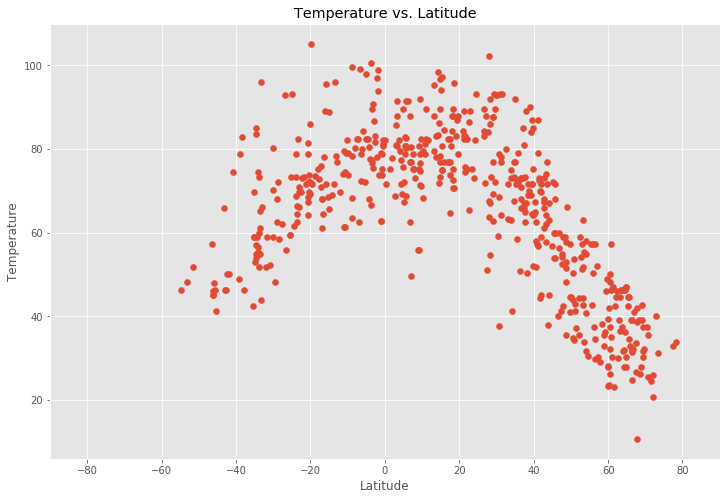

In [114]:
# Latitude vs Temperature
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.xlim(-90,90)
plt.title("Temperature vs. Latitude")

# Save image
plt.savefig("weather_df{}.png")
plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

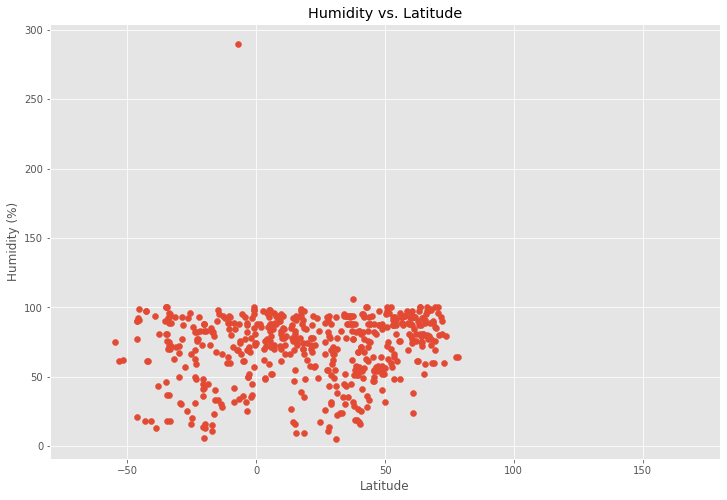

In [115]:
# Latitude vs Humidity

# Latitude vs Humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80,180)
plt.title("Humidity vs. Latitude")
# Save image
plt.savefig("weather_df{}.png")
plt.show()

#### Latitude vs. Humidity Plot

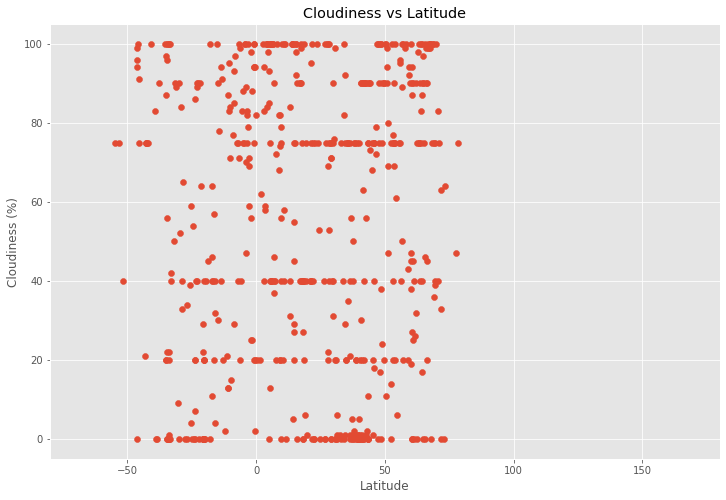

In [116]:
# Latitude vs Cloudliness  

plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80,180)
plt.title("Cloudiness vs Latitude")

# Save image
plt.savefig("weather_df{}.png")
plt.show()

#### Latitude vs. Cloudiness Plot

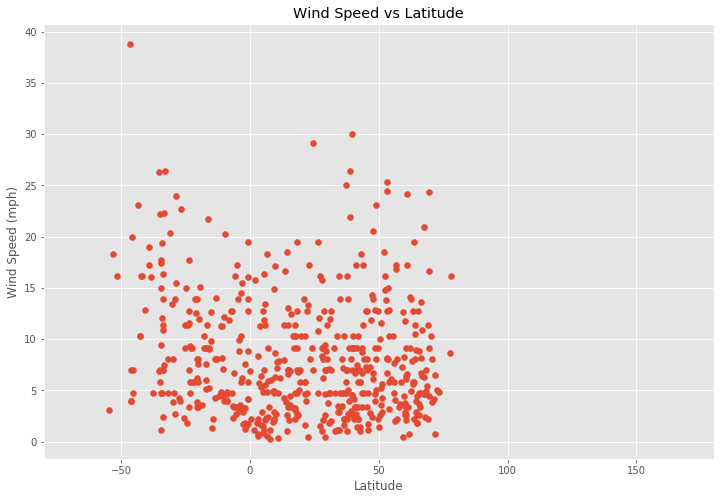

In [117]:
# Latitude vs Wind Speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,180)
plt.title("Wind Speed vs Latitude")
# Save image
plt.savefig("weather_df{}.png")
plt.show()

#### Latitude vs. Wind Speed Plot

R squard: -0.47771888526641104


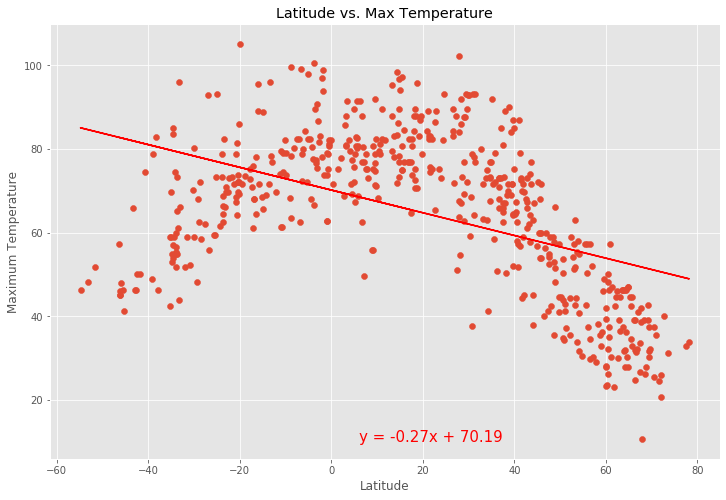

In [128]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title("Latitude vs. Max Temperature")

# Save image
print(f"R squard: {rvalue}")
plt.savefig("weather_df{}.png")
plt.show()

## Linear Regression

In [144]:
North_df = weather_df.loc[(weather_df['Latitude']<=0)]
North_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,mataura,99.0,NZ,2019-09-29 19:13:21,90.0,-46.19,168.86,45.00,4.00
4,cape town,20.0,ZA,2019-09-29 19:13:22,72.0,-33.93,18.42,60.01,13.87
5,port alfred,100.0,ZA,2019-09-29 19:13:22,95.0,-33.59,26.89,61.00,7.00
6,avarua,64.0,CK,2019-09-29 19:13:03,73.0,-21.21,-159.78,71.60,13.87
9,atuona,15.0,PF,2019-09-29 19:13:23,80.0,-9.80,-139.03,79.07,20.20


In [145]:
# Count of the data in the dataframe
North_df.count()

City          167
Cloudiness    167
Country       167
Date          167
Humidity      167
Latitude      167
Longitude     167
Max Temp      167
Wind Speed    167
dtype: int64

In [146]:
North_df.dtypes

City                  object
Cloudiness           float64
Country               object
Date          datetime64[ns]
Humidity             float64
Latitude             float64
Longitude            float64
Max Temp             float64
Wind Speed           float64
dtype: object

In [147]:
North_df.replace("", np.nan, inplace = True)
North_df = North_df.dropna()
North_df.head()
print(f"There are {len(North_df)} cities included in the weather analyses.")

There are 167 cities included in the weather analyses.


In [148]:
#Choose ggplot as style for plots
plt.style.use('ggplot')

# Size of plots
fig_size = plt.rcParams["figure.figsize"] # get current size
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size # customise plot size

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.6556595048591223


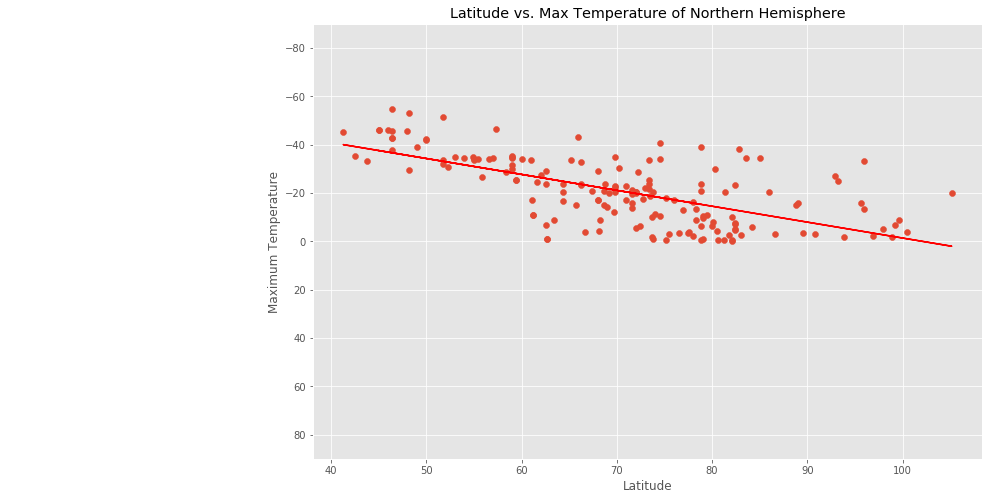

In [149]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = North_df['Max Temp']
y_values = North_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title("Latitude vs. Max Temperature of Northern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("North_df{}.png")
plt.show()

  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.03904575395621426


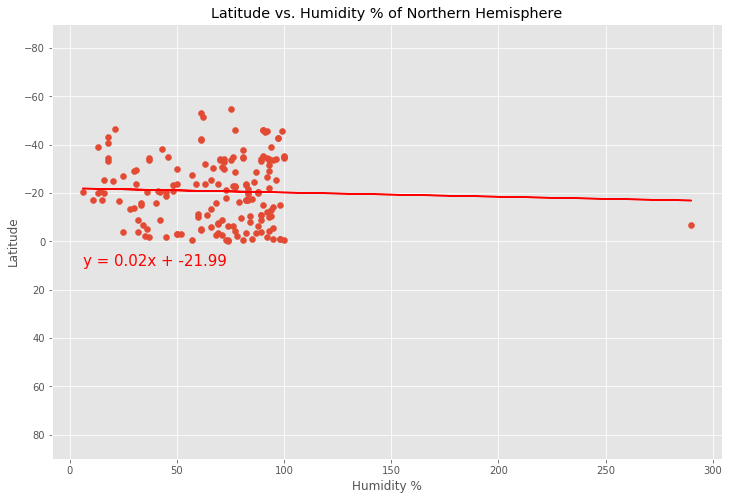

In [150]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = North_df['Humidity']
y_values = North_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Humidity %')
plt.ylabel('Latitude')
plt.title("Latitude vs. Humidity % of Northern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("North_df{}.png")
plt.show()

R squard: 0.12760752115467305


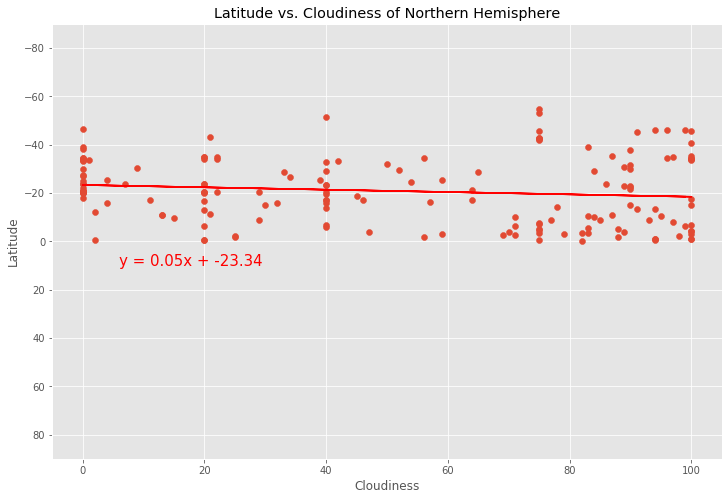

In [151]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = North_df['Cloudiness']
y_values = North_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("Latitude vs. Cloudiness of Northern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("North_df{}.png")
plt.show()

R squard: -0.3175977298163119


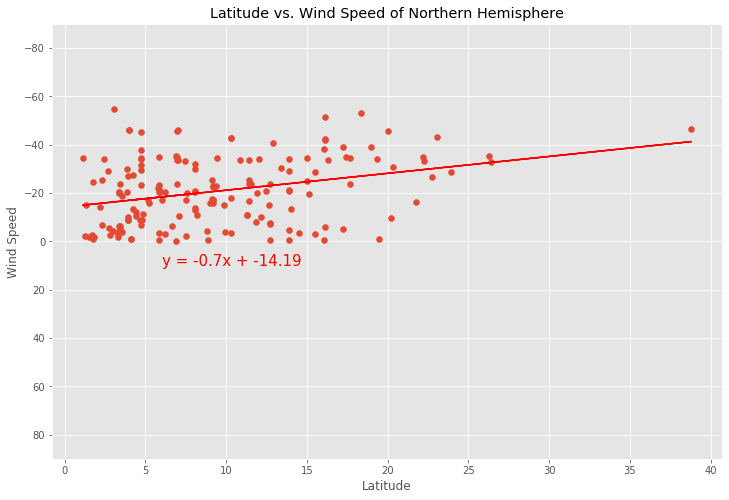

In [152]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = North_df['Wind Speed']
y_values = North_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs. Wind Speed of Northern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("North_df{}.png")
plt.show()

In [154]:
South_df = weather_df.loc[(weather_df['Latitude']>=0)]
South_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
1,yar-sale,99.0,RU,2019-09-29 19:13:22,77.0,66.83,70.83,32.09,10.92
2,bitung,20.0,ID,2019-09-29 19:13:22,88.0,1.44,125.19,75.20,1.12
3,mahibadhoo,100.0,MV,2019-09-29 19:13:22,72.0,3.78,72.97,82.13,11.23
7,butaritari,83.0,KI,2019-09-29 19:13:22,62.0,3.07,172.79,85.73,8.34
8,enshi,76.0,CN,2019-09-29 19:13:23,66.0,30.29,109.48,59.27,3.74


In [155]:
# Count of the data in the dataframe
South_df.count()

City          373
Cloudiness    373
Country       373
Date          373
Humidity      373
Latitude      373
Longitude     373
Max Temp      373
Wind Speed    373
dtype: int64

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [158]:
South_df.dtypes

City                  object
Cloudiness           float64
Country               object
Date          datetime64[ns]
Humidity             float64
Latitude             float64
Longitude            float64
Max Temp             float64
Wind Speed           float64
dtype: object

In [159]:
South_df.replace("", np.nan, inplace = True)
South_df = South_df.dropna()
South_df.head()
print(f"There are {len(South_df)} cities included in the weather analyses.")

There are 373 cities included in the weather analyses.


In [160]:
#Choose ggplot as style for plots
plt.style.use('ggplot')

# Size of plots
fig_size = plt.rcParams["figure.figsize"] # get current size
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size # customise plot size

R squard: -0.8168942360430156


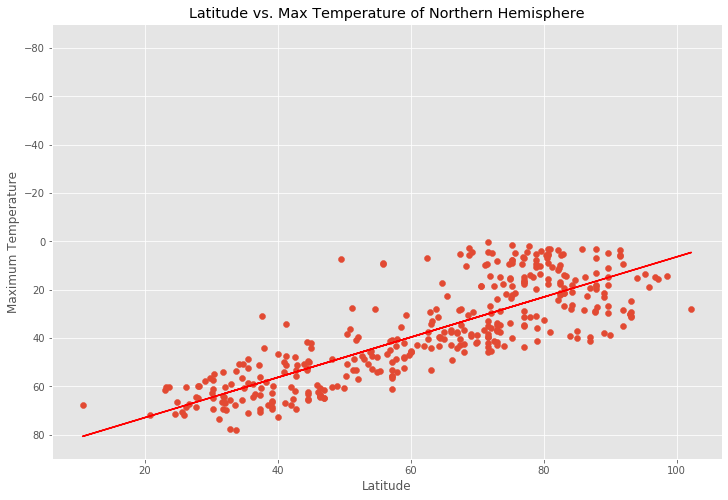

In [165]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = South_df['Max Temp']
y_values = South_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title("Latitude vs. Max Temperature of Northern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("South_df{}.png")
plt.show()

R squard: 0.1121881667503685


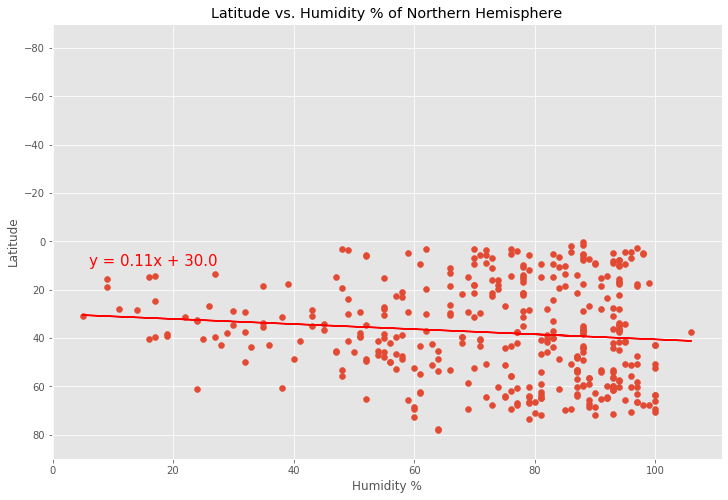

In [162]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = South_df['Humidity']
y_values = South_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Humidity %')
plt.ylabel('Latitude')
plt.title("Latitude vs. Humidity % of Northern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("South_df{}.png")
plt.show()

R squard: 0.03759889860245481


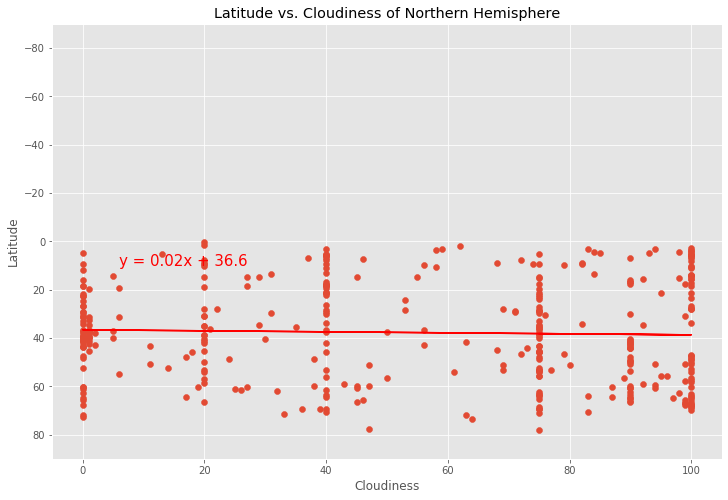

In [166]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = South_df['Cloudiness']
y_values = South_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("Latitude vs. Cloudiness of Northern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("South_df{}.png")
plt.show()

R squard: 0.09151535574763339


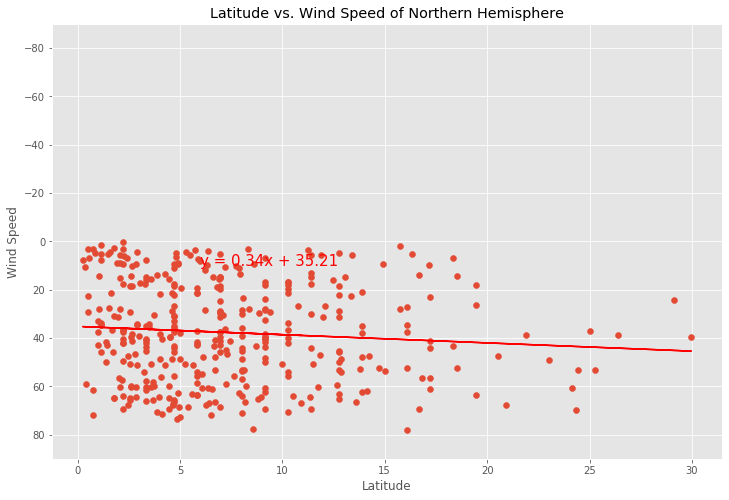

In [167]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = South_df['Wind Speed']
y_values = South_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs. Wind Speed of Northern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("South_df{}.png")
plt.show()